In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 구글드라이브 마운트 -> csv, xlsx파일을 가져오기 위해
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
My_df = pd.read_excel('/content/drive/MyDrive/과제이다.xlsx')
My_df.head()

,company,brand,product_name,shipping_product_name,quantity
0,달롤,달롤,쑥 쌀 파운드,달롤_쑥 쌀 파운드,3
1,달롤,달롤,그린바나나 쌀 휘낭시에,달롤_그린바나나 쌀 휘낭시에,1
2,달롤,달롤,달미칩(현미),달롤_달미칩(현미),5
3,달롤,달롤,달미칩(양파),달롤_달미칩(양파),4
4,달롤,달롤,달미칩(황태),달롤_달미칩(황태),3


In [ ]:
My_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                312 non-null    object
 1   brand                  312 non-null    object
 2   product_name           312 non-null    object
 3   shipping_product_name  312 non-null    object
 4   quantity               312 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 12.3+ KB


In [ ]:
My_df

,company,brand,product_name,shipping_product_name,quantity
0,달롤,달롤,쑥 쌀 파운드,달롤_쑥 쌀 파운드,3
1,달롤,달롤,그린바나나 쌀 휘낭시에,달롤_그린바나나 쌀 휘낭시에,1
2,달롤,달롤,달미칩(현미),달롤_달미칩(현미),5
3,달롤,달롤,달미칩(양파),달롤_달미칩(양파),4
4,달롤,달롤,달미칩(황태),달롤_달미칩(황태),3
...,...,...,...,...,...
307,푸드나무,잇메이트,닭가슴살 구운 주먹밥 김치,잇메이트_닭가슴살 구운 주먹밥 김치,5
308,푸드나무,잇메이트,스팀 닭가슴살 고추맛,잇메이트_스팀 닭가슴살 고추맛,3
309,푸드마스터,레몬킹,비타민C 레몬 곤약젤리,레몬킹_비타민C 레몬 곤약젤리,4
310,푸드마스터,레몬킹,비타민C 자몽 곤약젤리,레몬킹_비타민C 자몽 곤약젤리,4


In [ ]:
My_df.drop('brand', axis=1)

,company,product_name,shipping_product_name,quantity
0,달롤,쑥 쌀 파운드,달롤_쑥 쌀 파운드,3
1,달롤,그린바나나 쌀 휘낭시에,달롤_그린바나나 쌀 휘낭시에,1
2,달롤,달미칩(현미),달롤_달미칩(현미),5
3,달롤,달미칩(양파),달롤_달미칩(양파),4
4,달롤,달미칩(황태),달롤_달미칩(황태),3
...,...,...,...,...
307,푸드나무,닭가슴살 구운 주먹밥 김치,잇메이트_닭가슴살 구운 주먹밥 김치,5
308,푸드나무,스팀 닭가슴살 고추맛,잇메이트_스팀 닭가슴살 고추맛,3
309,푸드마스터,비타민C 레몬 곤약젤리,레몬킹_비타민C 레몬 곤약젤리,4
310,푸드마스터,비타민C 자몽 곤약젤리,레몬킹_비타민C 자몽 곤약젤리,4


In [ ]:
My_df2 = My_df.groupby('company')['quantity'].sum().reset_index()

In [ ]:
My_df2

,company,quantity
0,달롤,16
1,더플랜잇,25
2,드림잇,1
3,디자인푸드,29
4,라파스,6
5,렛츠플레이트,44
6,마이비밀,8
7,미트리,311
8,브랜드닭,73
9,비엘에프씨,22


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

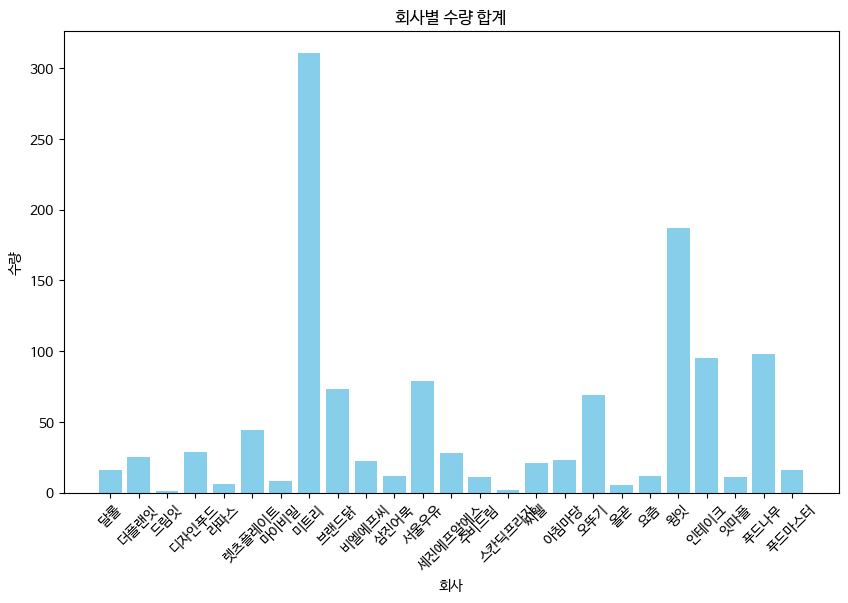

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(My_df2['company'], My_df2['quantity'], color='skyblue')
plt.xlabel('회사')
plt.ylabel('수량')
plt.title('회사별 수량 합계')
plt.xticks(rotation=45)
plt.show()